numpy -> np.array([1,2,3])

pandas -> pd.read_csv() -> Dataframe - like an excel sheet -> numpy arr -> sklearn  / tensorflow or pytorch

sklearn (sci-kit learn)-> machine learning library. it contains all algorithms such knn, LR, classification, trees.
tensorflow / pytorch -> deep learning libraries that contain algorithms related to NN

matplotlib.pyplot / seaborn / plotly -> plotting

opencv -> computer vision library

tesseract -> OCR - optical character recognition.

MNIST -> 70 thousand labeled images of handdrawn digit. Each image is 28x28 size.
Each image is labelled from 0 to 9.


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # instances x features, for advanced video operations -> auto encoders
import matplotlib.pyplot as plt
import numpy as np

In [14]:
mnist = fetch_openml("mnist_784")
X = mnist.data.astype('float32')

In [30]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

--

pandas dataframe | numpy |
can handle all sorts of data  | numbers |

--

In [ ]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [23]:
X = X.to_numpy()

In [26]:
X.shape

(70000, 784)

In [25]:
X[0].shape

(784,)

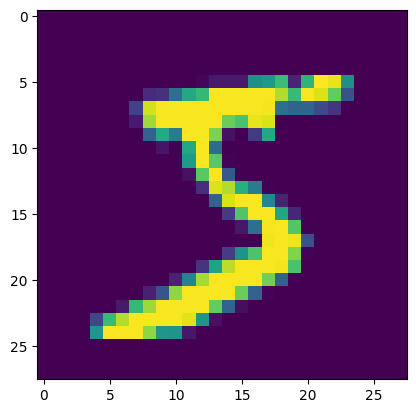

In [32]:
img0 = X[0].reshape(28, -1)
plt.imshow(img0)

In [36]:
min(1,1,1)

1

# Clustering
0. k = is given
1. Choose random k datapoints as centers and create groups label.
1.0 groups = []
1.1 centers = [p1, p2, p3]
2. Find the distance of every point from these centers. O(m * k), make every point label to the closest group.

Was_there_a_change?

for p in instances:
    closest = None, closest_distance = sys.maxint
    for center in centers:
        if dist(p, center) < closest_distance:
            closest = center
            groups[p] = center
    prev_group != Was_there_a_change
    
3. Find the new centers of these groups - mean of cordinates. and restart from 2 again.


In [33]:
mnist.target[0]

'5'

In [35]:
X = X / 255.0

In [43]:
np.sum((X[0] - X[1])**2), np.sum((X[95] - X[1])**2), 

(np.float32(0.0013476736), np.float32(0.00082566676))

In [42]:
mnist.target[[1, 95]]

1     0
95    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

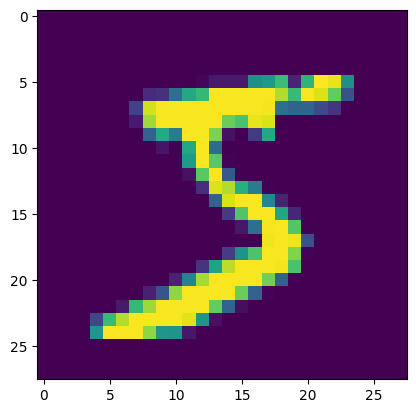

In [44]:
plt.imshow(X[0].reshape(28, -1))

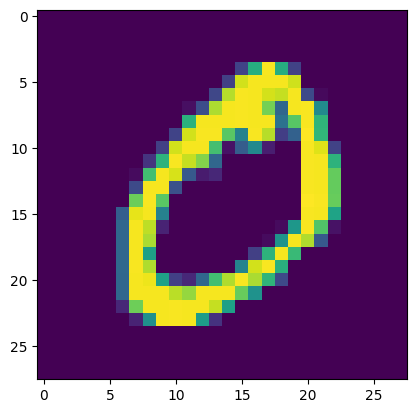

In [45]:
plt.imshow(X[1].reshape(28, -1))

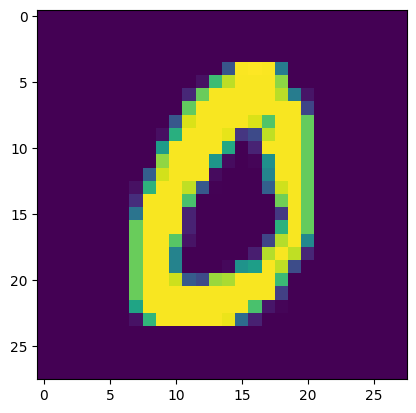

In [46]:
plt.imshow(X[95].reshape(28, -1))

In [89]:
kmeans = KMeans(n_clusters=10, random_state=4, n_init=10)
# kmeans.fit()
# clusters = kmeans.predict(X)
clusters = kmeans.fit_predict(X)

/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-pac

In [59]:
centroids = kmeans.cluster_centers_

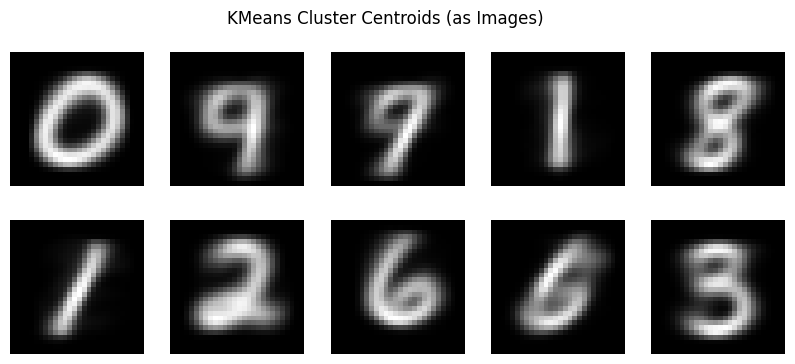

In [61]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(centroids[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("KMeans Cluster Centroids (as Images)")
plt.show()

In [62]:
labels = kmeans.predict(X)

In [ ]:
# indexices of digits in original data
# 5 -> 0, 11
# 0 -> 1, 
# 4 -> 2, 9, 
# 1 -> 3, 6, 8, 14

mnist.target[:20], labels[:20]

(0     5
 1     0
 2     4
 3     1
 4     9
 5     2
 6     1
 7     3
 8     1
 9     4
 10    3
 11    5
 12    3
 13    6
 14    1
 15    7
 16    2
 17    8
 18    6
 19    9
 Name: class, dtype: category
 Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9'],
 array([4, 0, 1, 5, 2, 6, 3, 4, 3, 2, 9, 5, 9, 7, 3, 2, 6, 4, 8, 2],
       dtype=int32))

In [77]:
all_predict_label = kmeans.predict(mnist.data[mnist.target == '1'].astype('float32'))


/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [ ]:
np.unique_counts(all_predict_label

UniqueCountsResult(values=array([0, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), counts=array([   6,    5, 2828, 1441, 3384,  178,   23,    3,    9]))

In [ ]:
instances = mnist.data[mnist.target == '2'].astype('float32')
all_predict_label = kmeans.predict(instances)
np.unique_counts(all_predict_label)

/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


UniqueCountsResult(values=array([0, 1, 2, 3, 4, 6, 7, 8, 9], dtype=int32), counts=array([ 462,    1,   10,    2,  466, 5499,  336,    4,  210]))

In [80]:
all_predict_label = kmeans.predict(mnist.data[mnist.target == '3'].astype('float32'))
np.unique_counts(all_predict_label)

/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


UniqueCountsResult(values=array([0, 1, 2, 3, 4, 6, 7, 8, 9], dtype=int32), counts=array([ 615,   10,    6,    1, 2417,  363,   47,   29, 3653]))

In [82]:
all_predict_label = kmeans.predict(mnist.data[mnist.target == '4'].astype('float32'))
np.unique_counts(all_predict_label)

/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


UniqueCountsResult(values=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), counts=array([ 659, 1657, 1222,    1, 1912,    4,  347,  893,   81,   48]))

In [84]:
all_predict_label = kmeans.predict(mnist.data[mnist.target == '5'].astype('float32'))
np.unique_counts(all_predict_label)

/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


UniqueCountsResult(values=array([0, 1, 2, 4, 5, 6, 7, 8, 9], dtype=int32), counts=array([1634,    8,   20, 2486,    8,  191,   96,  844, 1026]))

In [85]:
all_predict_label = kmeans.predict(mnist.data[mnist.target == '6'].astype('float32'))
np.unique_counts(all_predict_label)

/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


UniqueCountsResult(values=array([0, 1, 4, 5, 6, 7, 8, 9], dtype=int32), counts=array([ 681,    1,  397,    5,  126, 4714,  945,    7]))

In [86]:
all_predict_label = kmeans.predict(mnist.data[mnist.target == '7'].astype('float32'))
np.unique_counts(all_predict_label)

/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


UniqueCountsResult(values=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), counts=array([ 766, 1083, 4013,    7, 1103,   13,  220,   47,    3,   38]))

In [87]:
all_predict_label = kmeans.predict(mnist.data[mnist.target == '8'].astype('float32'))
np.unique_counts(all_predict_label)

/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


UniqueCountsResult(values=array([0, 1, 2, 4, 5, 6, 7, 8, 9], dtype=int32), counts=array([ 343,    3,    6, 5578,    2,  128,   71,   18,  676]))

/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9

Original dim: (70000, 784)
Reduced dim: (70000, 50)


/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:197: RuntimeWarning: divide by zero encountered in matmul
  return X @ self.components_ + self.mean_
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:197: RuntimeWarning: overflow encountered in matmul
  return X @ self.components_ + self.mean_
/Users/sandeepgiri/projects/june_2025_iitr/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:197: RuntimeWarning: invalid value encountered in matmul
  return X @ self.components_ + self.mean_


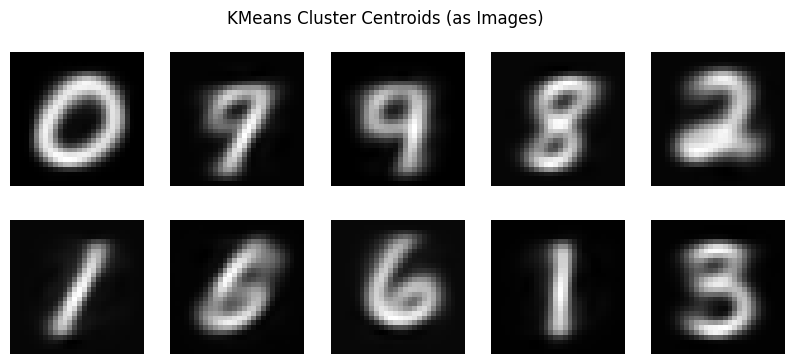

In [88]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

print("Original dim:", X.shape)
print("Reduced dim:", X_pca.shape)

# --- Step 3: Apply KMeans clustering ---
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# --- Step 4: Visualize 10 cluster centroids as images ---
centroids = kmeans.cluster_centers_
centroids_original_space = pca.inverse_transform(centroids)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(centroids_original_space[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("KMeans Cluster Centroids (as Images)")
plt.show()

In [ ]:
np.random.seed(1) # to improve reproduciblity
print(np.random.random((5,)))
print(np.random.random((5,)))
print(np.random.random((5,)))

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0.09233859 0.18626021 0.34556073 0.39676747 0.53881673]
[0.41919451 0.6852195  0.20445225 0.87811744 0.02738759]


In [99]:
np.random.seed(1)
print(np.random.random((5,)))
print(np.random.random((5,)))
print(np.random.random((5,)))

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0.09233859 0.18626021 0.34556073 0.39676747 0.53881673]
[0.41919451 0.6852195  0.20445225 0.87811744 0.02738759]


In [102]:
kmeans.cluster_centers_.shape

(10, 784)

### Task : Lots of instances. to be labeled in 10 bucket
- group them into 10 buckets using unsupervised learning algrithm such as kmeans
- now, label the groups.


<!-- DBScan etc. -->

Kmeans -> usual data but not things like images, video etc., text
IN case of complex dataset such as images always drop the dimension using either some model or using PCA dimensionality reduction